Question 1

1.1

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold

In [17]:
df = pd.read_csv('Hitters.csv')
print(df.shape)
df.head()

(322, 21)


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [18]:
df.dropna(axis=0, subset=['Salary'], inplace=True)
df = df.select_dtypes(include=['number'])
print(df.shape)
df.head()

(263, 17)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [19]:
y = df.pop('Salary')
X = df

Using all data as training set to plot coefficient path

In [20]:
n_alphas = 200
alphas = np.logspace(-2, 8, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=100000)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

res = pd.DataFrame(coefs, columns=['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 
                            'CWalks', 'PutOuts', 'Assists', 'Errors'], index=alphas)
res.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0.010000,-2.202947,7.827192,2.161638,-2.098811,-0.022303,6.150749,-2.588215,-0.176304,0.069905,-0.232744,1.609937,0.801293,-0.793897,0.294575,0.383982,-2.878225
0.011227,-2.202938,7.827123,2.161404,-2.098718,-0.022228,6.150711,-2.587705,-0.176308,0.069922,-0.232702,1.609923,0.801276,-0.793892,0.294575,0.383981,-2.878165
0.012604,-2.202928,7.827044,2.161141,-2.098614,-0.022144,6.150668,-2.587133,-0.176312,0.069942,-0.232655,1.609907,0.801258,-0.793885,0.294576,0.383979,-2.878097
0.014150,-2.202917,7.826956,2.160846,-2.098497,-0.022049,6.150619,-2.586491,-0.176316,0.069964,-0.232602,1.609890,0.801237,-0.793879,0.294576,0.383977,-2.878022
0.015886,-2.202904,7.826858,2.160515,-2.098365,-0.021943,6.150565,-2.585770,-0.176321,0.069989,-0.232542,1.609870,0.801213,-0.793871,0.294576,0.383975,-2.877937


Text(0, 0.5, 'weights')

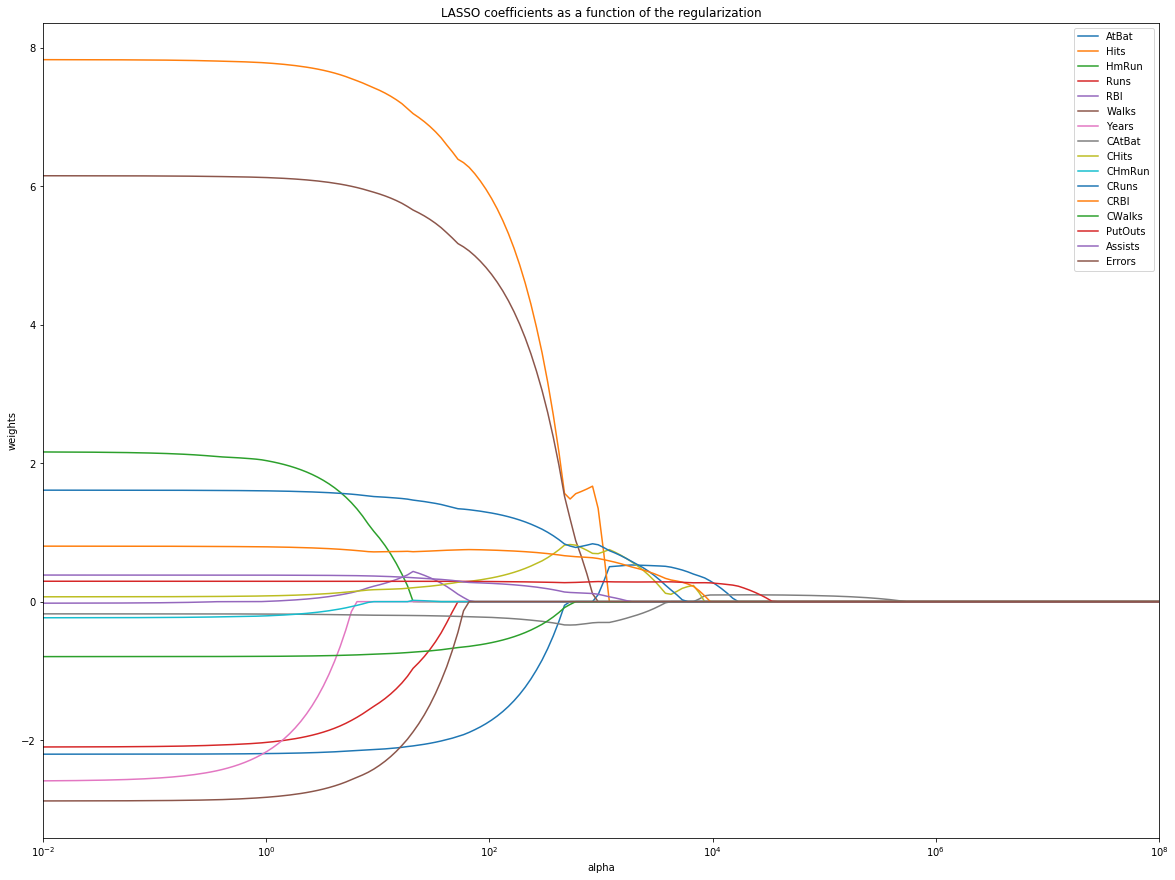

In [21]:
ax = res.plot(figsize=(20, 15), logx=True, title='LASSO coefficients as a function of the regularization')
ax.set_xlabel('alpha')
ax.set_ylabel('weights')

In [22]:
lasso1 = Lasso(alpha=10**4, max_iter=100000)
lasso1.fit(X, y)
print(lasso1.coef_)

[ 0.27819829  0.          0.          0.          0.          0.
 -0.          0.09641141  0.          0.          0.          0.
  0.          0.26875886  0.         -0.        ]


If use all data as training set, last three coefficients are AtBat, CAtBat, PutOuts

Now randomly split dataset into a training set and a test set, the ratio is 7:3, see whether the result would change

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0, 0.5, 'weights')

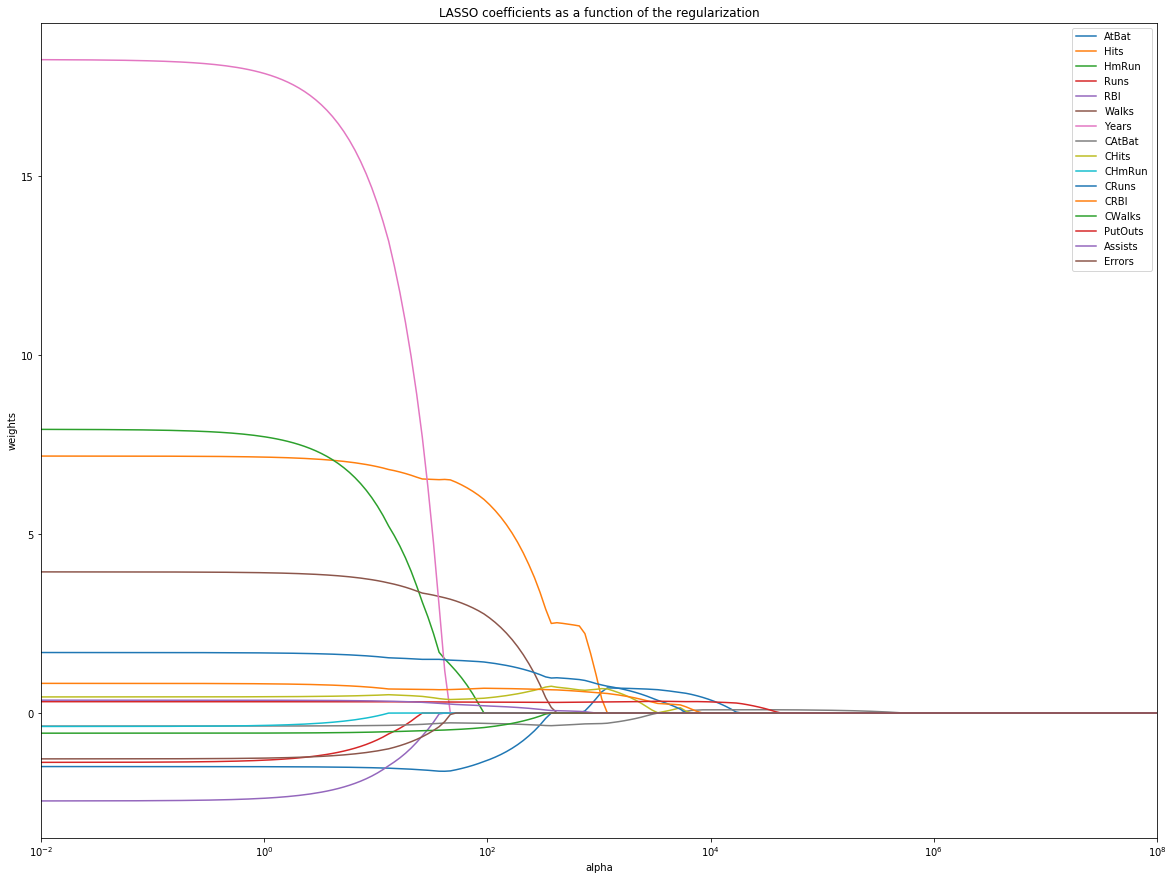

In [24]:
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=100000)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
res = pd.DataFrame(coefs, columns=['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 
                            'CWalks', 'PutOuts', 'Assists', 'Errors'], index=alphas)
ax = res.plot(figsize=(20, 15), logx=True, title='LASSO coefficients as a function of the regularization')
ax.set_xlabel('alpha')
ax.set_ylabel('weights')

In [25]:
lasso1 = Lasso(alpha=15000, max_iter=100000)
lasso1.fit(x_train, y_train)
print(lasso1.coef_)

[ 0.12368017  0.          0.          0.          0.          0.
 -0.          0.09229738  0.          0.          0.          0.
  0.          0.28881896  0.         -0.        ]


Using a random train set, the last three coefficients are still AtBat, CAtBat, PutOuts

Now using 5 fold cross validation to find out best alpha(lambda)

In [26]:
lassocv = LassoCV(alphas=alphas, max_iter=100000, cv=5, random_state=42)
lassocv.fit(X, y)
print(lassocv.alpha_)
print(lassocv.score(X, y))

104.73708979594508
0.5244709892322966


The best alpha is found to be 104.73708979594508

In [27]:
lasso1 = Lasso(alpha=104.73708979594508, max_iter=100000)
lasso1.fit(X, y)
print(lasso1.coef_)

[-1.7105079   5.82193293  0.         -0.          0.          4.72588778
 -0.         -0.2278943   0.34271773  0.          1.27963698  0.7444303
 -0.59194542  0.29021573  0.26382169 -0.        ]


10 coefficients are left when we set alpha to be 104.73708979594508

1.2

Now use a different model - ridge

In [31]:
n_alphas = 200
alphas = np.logspace(0, 10, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, max_iter=100000)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

res = pd.DataFrame(coefs, columns=['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 
                            'CWalks', 'PutOuts', 'Assists', 'Errors'], index=alphas)
res.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1.000000,-2.202879,7.826971,2.161960,-2.098687,-0.022460,6.150629,-2.588083,-0.176312,0.069919,-0.232827,1.609933,0.801331,-0.793885,0.294575,0.383985,-2.878255
1.122668,-2.202862,7.826874,2.161766,-2.098579,-0.022404,6.150576,-2.587558,-0.176316,0.069938,-0.232795,1.609919,0.801320,-0.793878,0.294575,0.383983,-2.878199
1.260383,-2.202842,7.826765,2.161548,-2.098457,-0.022341,6.150517,-2.586969,-0.176321,0.069960,-0.232760,1.609903,0.801306,-0.793870,0.294576,0.383982,-2.878136
1.414991,-2.202820,7.826643,2.161303,-2.098321,-0.022271,6.150450,-2.586308,-0.176327,0.069984,-0.232719,1.609885,0.801291,-0.793862,0.294576,0.383980,-2.878065
1.588565,-2.202795,7.826505,2.161028,-2.098169,-0.022192,6.150375,-2.585567,-0.176333,0.070012,-0.232674,1.609865,0.801275,-0.793852,0.294576,0.383978,-2.877985


Text(0, 0.5, 'weights')

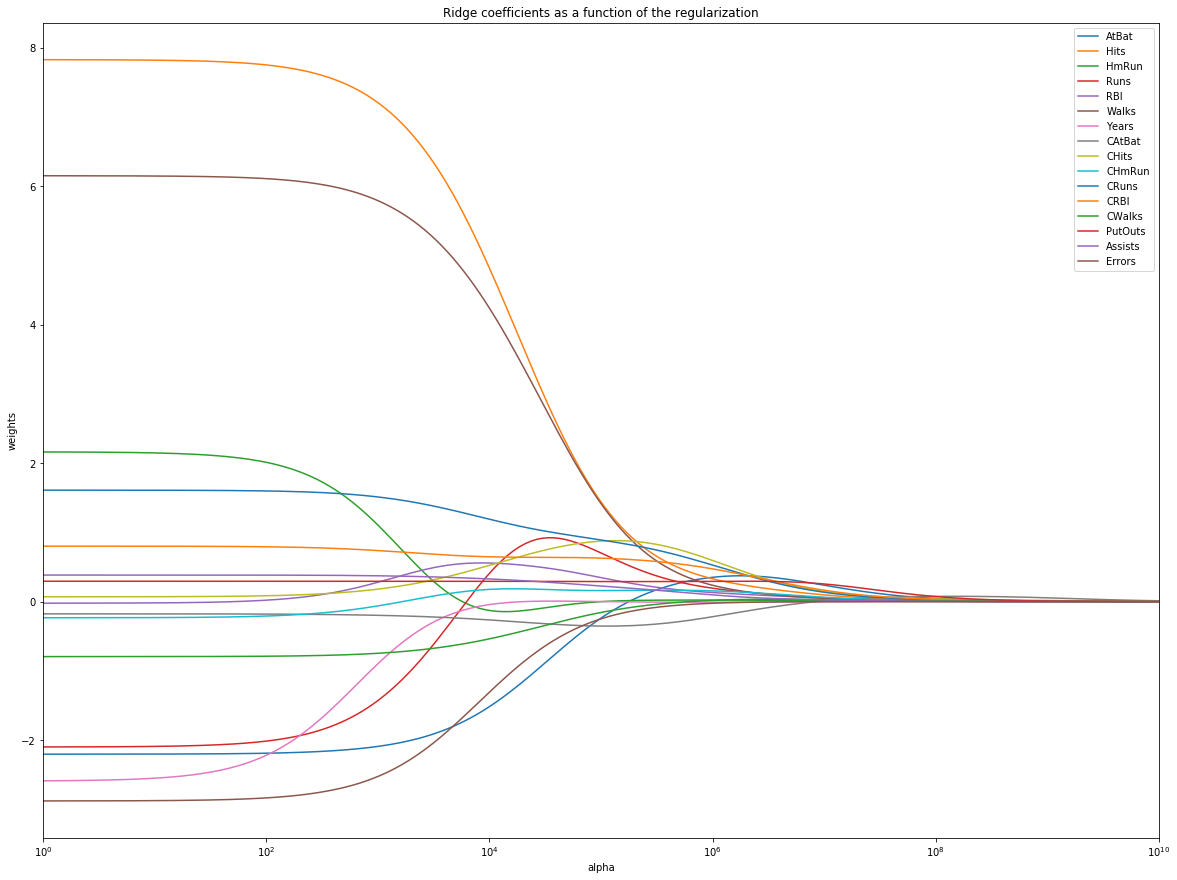

In [32]:
ax = res.plot(figsize=(20, 15), logx=True, title='Ridge coefficients as a function of the regularization')
ax.set_xlabel('alpha')
ax.set_ylabel('weights')

Above is the coefficient trajectories

Now use 5 fold cross validation found out the best alpha

In [36]:
ridgecv = RidgeCV(alphas=alphas, cv=5)
ridgecv.fit(X, y)
print(ridgecv.alpha_)
print(ridgecv.score(X, y))

16638.168860761307
0.5200738904397093


C:\Users\Administrator.DESKTOP-72444VQ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


It turns out to be 16638.168860761307

Question 2

Bias-Variance Tradeoff:

I think bias-variance tradeoff is a property of supervised machine learning model. Simply speaking, a model has a low bias error usually tends to have a high variance error, and vice versa. Therefore, when one trying to reduce bias error, it might cause a significant increase in variance error and result in an increase in total error.

Bias error is from erroneous assumption, it is often caused by over-simplified model. For example, when insufficient number of features are used, it might lead to high bias error (underfitting). On the other hand, variance is the amount that the estimation would change if different training set is used. It reflects the sensitivity of the model to different training set. A high variance error might caused by using too many different features (overfitting). So, usually, a data scientist's target is to find a balance point where bias and variance errors are both relatively low, instead of one is too low, and the other is very high, leading to a very high total error.

A regularization term is often used to prevent overfitting problem and help finding this balance point. It helps the model find balance in bias-variance tradeoff. It will penalize the model if it is too complex. 

For example, in a linear regression model, LASSO, as we adjust value of alpha (lambda, regularization parameter) from small to large, the coefficents of different numeric features will tends to be zero, and as alpha increases, the number of features remains in the model decreases. Therefore, the bigger alpha we select, the less complex the model is. When alpha is set to 0, LASSO is a normal linear regression model without regularization. What I find out using cross validation in Question 1 is, the model performs best when alpha is set to be 104.73708979594508, and only 10 out of 16 features have weights more than 0 under this selections. It indicates instead of using all given features to build a more complex model (high variance), choose only 10 of them will lead to a better result.